In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [123]:
df = pd.read_csv("./data_sets/nfl_team_stats_2002-2022.csv")
pd.set_option('display.max_columns', 50)
df['date']= pd.to_datetime(df['date'])
df['year'] = np.where(df['date'].dt.month > 2 ,df['date'].dt.year, df['date'].dt.year - 1)
df['won'] = np.where(df['score_away'] < df['score_home'], "home", "away")

def split_df(old_df, team, opp):
    new_df = old_df.copy()
    new_df['des'] = team
    new_df['won'] = new_df['won'] == new_df['des']
    new_df.columns = new_df .columns.str.replace(f'_{team}', '').str.replace(f'_{opp}', '_opp')
    return new_df .rename(columns={team: "team", opp: "opp"})

df_away = split_df(df, "away", "home")
df_home = split_df(df, "home", "away")

df = pd.concat([df_away, df_home]).sort_values("date")

df.head()

,date,team,opp,first_downs,first_downs_opp,third_downs,third_downs_opp,fourth_downs,fourth_downs_opp,passing_yards,passing_yards_opp,rushing_yards,rushing_yards_opp,total_yards,total_yards_opp,comp_att,comp_att_opp,sacks,sacks_opp,rushing_attempts,rushing_attempts_opp,fumbles,fumbles_opp,int,int_opp,turnovers,turnovers_opp,penalties,penalties_opp,redzone,redzone_opp,drives,drives_opp,def_st_td,def_st_td_opp,possession,possession_opp,score,score_opp,year,won,des
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32,32:28,16,13,2002,True,away
0,2002-09-05,Giants,49ers,21,13,9-16,4-12,0-1,0-0,318,166,43,113,361,279,28-45,16-26,3-24,0-0,22,25,0,0,3,1,3,1,10-80,5-29,0-6,0-8,15,13,0,0,32:28,27:32,13,16,2002,False,home
14,2002-09-08,Texans,Cowboys,13,11,2-15,2-13,0-0,0-0,123,112,87,155,210,267,10-22,13-30,6-22,3-19,35,24,0,1,1,1,1,2,11-80,9-117,0-4,0-2,19,18,0,0,33:55,26:05,19,10,2002,True,home
11,2002-09-08,Broncos,Rams,18,15,2-10,3-12,1-1,0-1,187,295,104,32,291,327,18-27,32-41,4-15,3-20,26,13,0,1,2,1,2,2,3-31,6-44,0-1,0-2,2,5,0,0,28:14,31:46,23,16,2002,True,home
10,2002-09-08,Jaguars,Colts,19,18,8-16,9-14,3-3,0-0,225,203,118,104,343,307,22-36,19-31,1-3,1-8,32,28,1,2,1,0,2,2,5-40,2-14,0-8,0-6,16,17,0,2,32:33,27:27,25,28,2002,False,home


In [124]:
df.shape

(11282, 42)

In [125]:
df.dtypes

date                    datetime64[ns]
team                            object
opp                             object
first_downs                      int64
first_downs_opp                  int64
third_downs                     object
third_downs_opp                 object
fourth_downs                    object
fourth_downs_opp                object
passing_yards                    int64
passing_yards_opp                int64
rushing_yards                    int64
rushing_yards_opp                int64
total_yards                      int64
total_yards_opp                  int64
comp_att                        object
comp_att_opp                    object
sacks                           object
sacks_opp                       object
rushing_attempts                 int64
rushing_attempts_opp             int64
fumbles                          int64
fumbles_opp                      int64
int                              int64
int_opp                          int64
turnovers                

In [126]:
df.columns

Index(['date', 'team', 'opp', 'first_downs', 'first_downs_opp', 'third_downs',
       'third_downs_opp', 'fourth_downs', 'fourth_downs_opp', 'passing_yards',
       'passing_yards_opp', 'rushing_yards', 'rushing_yards_opp',
       'total_yards', 'total_yards_opp', 'comp_att', 'comp_att_opp', 'sacks',
       'sacks_opp', 'rushing_attempts', 'rushing_attempts_opp', 'fumbles',
       'fumbles_opp', 'int', 'int_opp', 'turnovers', 'turnovers_opp',
       'penalties', 'penalties_opp', 'redzone', 'redzone_opp', 'drives',
       'drives_opp', 'def_st_td', 'def_st_td_opp', 'possession',
       'possession_opp', 'score', 'score_opp', 'year', 'won', 'des'],
      dtype='object')

In [127]:
df.isna().sum()

date                    0
team                    0
opp                     0
first_downs             0
first_downs_opp         0
third_downs             0
third_downs_opp         0
fourth_downs            0
fourth_downs_opp        0
passing_yards           0
passing_yards_opp       0
rushing_yards           0
rushing_yards_opp       0
total_yards             0
total_yards_opp         0
comp_att                0
comp_att_opp            0
sacks                   0
sacks_opp               0
rushing_attempts        0
rushing_attempts_opp    0
fumbles                 0
fumbles_opp             0
int                     0
int_opp                 0
turnovers               0
turnovers_opp           0
penalties               0
penalties_opp           0
redzone                 0
redzone_opp             0
drives                  0
drives_opp              0
def_st_td               0
def_st_td_opp           0
possession              0
possession_opp          0
score                   0
score_opp   

In [128]:
df.describe()

,date,first_downs,first_downs_opp,passing_yards,passing_yards_opp,rushing_yards,rushing_yards_opp,total_yards,total_yards_opp,rushing_attempts,rushing_attempts_opp,fumbles,fumbles_opp,int,int_opp,turnovers,turnovers_opp,drives,drives_opp,def_st_td,def_st_td_opp,score,score_opp,year
count,11282,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000,11282.000000
mean,2012-12-01 12:15:11.327778816,19.500975,19.500975,224.402943,224.402943,114.444779,114.444779,338.847722,338.847722,27.139426,27.139426,0.631360,0.631360,0.919695,0.919695,1.551055,1.551055,12.177451,12.177451,0.326361,0.326361,22.268924,22.268924,2012.063109
min,2002-09-05 00:00:00,3.000000,3.000000,-7.000000,-7.000000,-18.000000,-18.000000,26.000000,26.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2002.000000
25%,2007-10-08 00:00:00,16.000000,16.000000,169.000000,169.000000,77.000000,77.000000,281.000000,281.000000,21.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11.000000,11.000000,0.000000,0.000000,15.000000,15.000000,2007.000000
50%,2012-11-18 00:00:00,19.000000,19.000000,220.000000,220.000000,107.000000,107.000000,339.000000,339.000000,27.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,12.000000,12.000000,0.000000,0.000000,22.000000,22.000000,2012.000000
75%,2017-12-24 00:00:00,23.000000,23.000000,276.000000,276.000000,145.000000,145.000000,396.000000,396.000000,32.000000,32.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,13.000000,13.000000,0.000000,0.000000,29.000000,29.000000,2017.000000
max,2023-02-12 00:00:00,40.000000,40.000000,522.000000,522.000000,404.000000,404.000000,653.000000,653.000000,60.000000,60.000000,5.000000,5.000000,6.000000,6.000000,8.000000,8.000000,26.000000,26.000000,6.000000,6.000000,62.000000,62.000000,2022.000000
std,NaN,5.044879,5.044879,78.408835,78.408835,51.730216,51.730216,85.116671,85.116671,7.867125,7.867125,0.799334,0.799334,1.006725,1.006725,1.320909,1.320909,2.535568,2.535568,0.782891,0.782891,10.233832,10.233832,6.084584


In [129]:
df.head()

,date,team,opp,first_downs,first_downs_opp,third_downs,third_downs_opp,fourth_downs,fourth_downs_opp,passing_yards,passing_yards_opp,rushing_yards,rushing_yards_opp,total_yards,total_yards_opp,comp_att,comp_att_opp,sacks,sacks_opp,rushing_attempts,rushing_attempts_opp,fumbles,fumbles_opp,int,int_opp,turnovers,turnovers_opp,penalties,penalties_opp,redzone,redzone_opp,drives,drives_opp,def_st_td,def_st_td_opp,possession,possession_opp,score,score_opp,year,won,des
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32,32:28,16,13,2002,True,away
0,2002-09-05,Giants,49ers,21,13,9-16,4-12,0-1,0-0,318,166,43,113,361,279,28-45,16-26,3-24,0-0,22,25,0,0,3,1,3,1,10-80,5-29,0-6,0-8,15,13,0,0,32:28,27:32,13,16,2002,False,home
14,2002-09-08,Texans,Cowboys,13,11,2-15,2-13,0-0,0-0,123,112,87,155,210,267,10-22,13-30,6-22,3-19,35,24,0,1,1,1,1,2,11-80,9-117,0-4,0-2,19,18,0,0,33:55,26:05,19,10,2002,True,home
11,2002-09-08,Broncos,Rams,18,15,2-10,3-12,1-1,0-1,187,295,104,32,291,327,18-27,32-41,4-15,3-20,26,13,0,1,2,1,2,2,3-31,6-44,0-1,0-2,2,5,0,0,28:14,31:46,23,16,2002,True,home
10,2002-09-08,Jaguars,Colts,19,18,8-16,9-14,3-3,0-0,225,203,118,104,343,307,22-36,19-31,1-3,1-8,32,28,1,2,1,0,2,2,5-40,2-14,0-8,0-6,16,17,0,2,32:33,27:27,25,28,2002,False,home


NFL Home away 

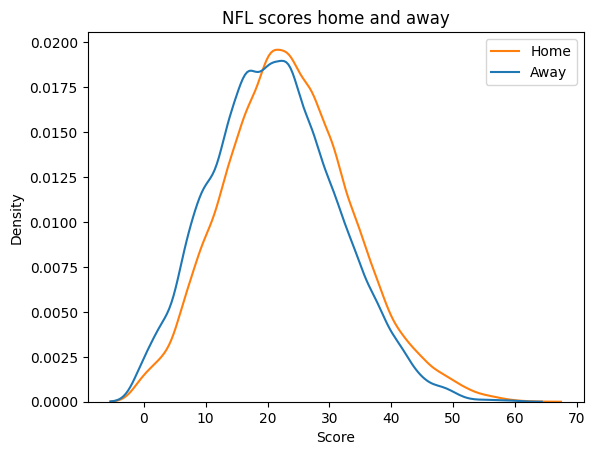

In [130]:
sns.kdeplot(df, x="score", hue="des")
plt.xlabel("Score")
plt.title("NFL scores home and away")
plt.legend(labels=['Home', 'Away'])
plt.show()



Yard and score changes over years

<Axes: xlabel='rushing_yards', ylabel='passing_yards'>

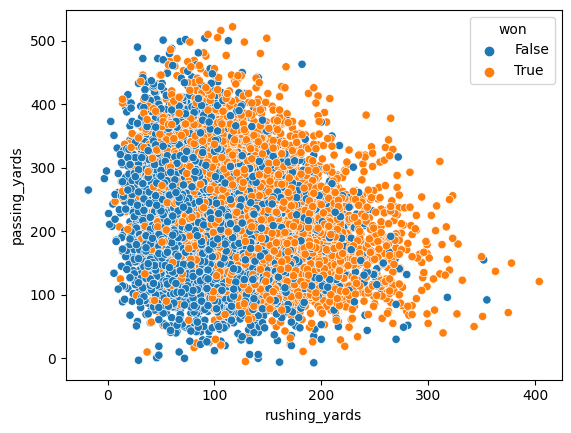

In [135]:
sns.scatterplot(df, x="rushing_yards", y="passing_yards", hue="won")

<Axes: xlabel='fumbles', ylabel='int'>

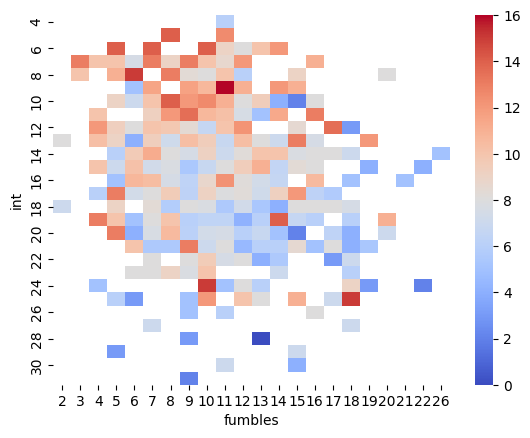

In [150]:
grouped = df.groupby(["team", "year"])[["int", "fumbles", "turnovers", "won"]].sum().groupby(["int", "fumbles"])["won"].mean().reset_index().pivot(index='int', columns='fumbles', values='won')

sns.heatmap(grouped, cmap="coolwarm")

With teams have passing and scoring more every year does this lessen the impact turnovers have on the game?

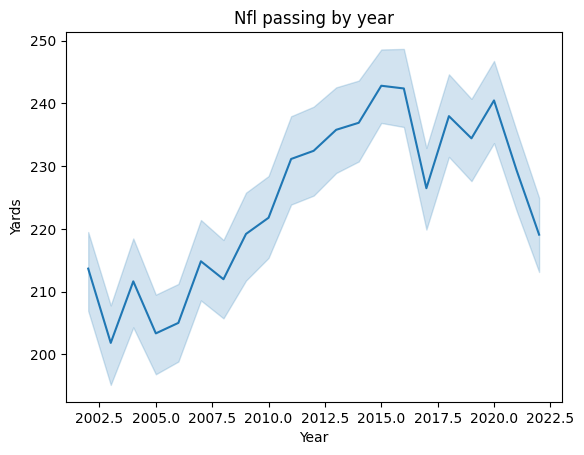

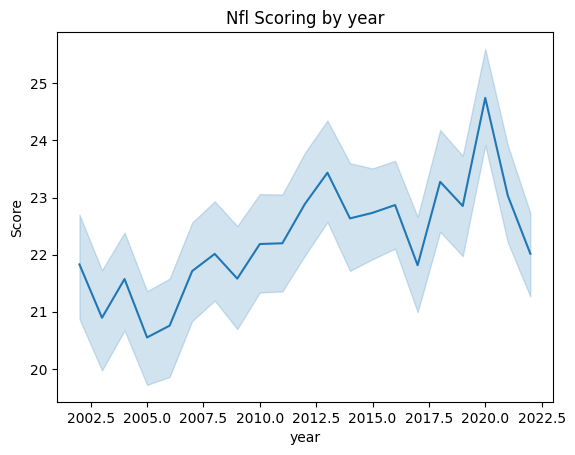

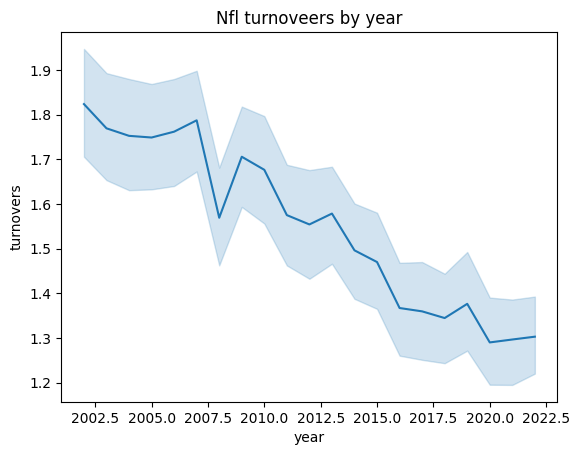

In [201]:
sns.lineplot(df, x="year", y="passing_yards")
plt.xlabel("Year")
plt.ylabel("Yards")
plt.title("Nfl passing by year")
plt.show()

sns.lineplot(df, x="year", y="score")
plt.ylabel("Score")
plt.title("Nfl Scoring by year")
plt.show()

sns.lineplot(df, x="year", y="turnovers")
plt.ylabel("turnovers")
plt.title("Nfl turnovers by year")
plt.show()

c:\Users\Intern\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


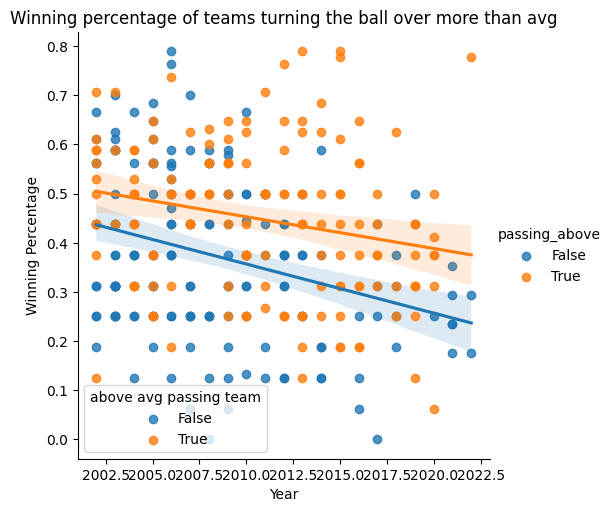

In [240]:
#why is the query only returning 3/32 teams for 2022 should be closer to 16
data = df.groupby(["year", "team"])[['turnovers', "won", "passing_yards"]].mean().reset_index().query("turnovers > turnovers.mean()")
data["passing_above"] = data["passing_yards"] > data["passing_yards"].mean()

sns.lmplot(data, x="year", y="won", hue="passing_above")
plt.title("Winning percentage of teams turning the ball over more than avg")
plt.xlabel("Year")
plt.ylabel("Winning Percentage")
plt.legend(title="above avg passing team")


Turnovers vs special team and defensive touchdowns which is more important